In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data/new_test.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df

,country,plane_transport,content,weight,S1,S2,S3,alarm
0,France,1,electrical,88.726753,1,0,1,1
1,Russia,0,electrical,17.431925,0,1,0,0
2,Russia,0,tiles,38.113146,0,0,0,0
3,Russia,0,electrical,12.395162,0,1,1,0
4,Russia,0,banana,52.598093,0,0,1,0
...,...,...,...,...,...,...,...,...
9995,France,0,wood,4.350038,0,1,1,1
9996,France,1,tiles,94.091993,0,0,1,0
9997,China,1,banana,74.832256,1,0,1,1
9998,France,1,tiles,19.983145,1,0,0,1


In [6]:
model = smf.logit(formula="alarm~ C(country, Treatment('Russia'))+weight + C(content, Treatment('banana'))", data=df)
results = model.fit(maxiter=40)
results.summary()

Optimization terminated successfully.
         Current function value: 0.653989
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  alarm   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Thu, 11 Aug 2022   Pseudo R-squ.:                 0.01326
Time:                        15:50:24   Log-Likelihood:                -6539.9
converged:                       True   LL-Null:                       -6627.8
Covariance Type:            nonrobust   LLR p-value:                 2.699e-35
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -0.5095      0.062     -8.174      0.000      -0.632      -0.387
C(country, Treatment('Russia'))[T.China]         -0.4163      0.051     -8.159      0.000      -0.516      -0.316
C(country, Treatment('Russia'))[T.France]        -0.1967      0.050     -3.915      0.000      -0.295      -0.098
C(content, Treatment('banana'))[T.electrical]    -0.2840      0.059     -4.780      0.000      -0.400      -0.168
C(content, Treatment('banana'))[T.tiles]         -0.0543      0.058     -0.939      0.348      -0.168       0.059
C(content, Treatment('banana'))[T.wood]          -0.1704      0.059     -2.902      0.004      -0.286      -0.055
weight                                            0.0065      0.001      8.988      0.000       0.005       0.008
=================================================================================================================
"""

In [19]:
content = pd.DataFrame([
    {'content': 'banana', 'country': 'Russia', 'weight': 200},
    {'content': 'banana', 'country': 'China', 'weight': 1},
    {'content': 'banana', 'country': 'France', 'weight': 1},
    {'content': 'banana', 'country': 'France','weight': 2},
])

content['predicted'] = results.predict(content)

In [20]:
content

,content,country,weight,predicted
0,banana,Russia,200,0.688941
1,banana,China,1,0.285108
2,banana,France,1,0.331878
3,banana,France,2,0.333326


In [10]:
# What effect does the country have on whether alarm was set off?
model = smf.logit(formula='S2~ plane_transport', data=df)
results = model.fit(maxiter=40)

Optimization terminated successfully.
         Current function value: 0.351211
         Iterations 25


In [11]:
plane_transport = pd.DataFrame([
    {'plane_transport': 0},
    {'plane_transport': 1}
])

plane_transport['predicted'] = results.predict(plane_transport)

In [12]:
plane_transport

,plane_transport,predicted
0,0,5.086819e-01
1,1,1.356947e-38


In [7]:
country = pd.DataFrame([
    { 'country': 'China' },
    { 'country': 'France' },
    { 'country': 'Russia' },

])

country['predicted'] = results.predict(country)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'plane_transport' is not defined
    S1 ~ plane_transport
         ^^^^^^^^^^^^^^^

In [5]:
transport

,country,predicted
0,China,0.552546
1,France,0.443531
2,Russia,0.347498


(array([7471.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2529.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

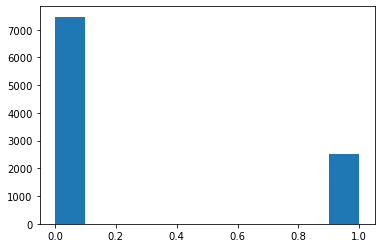

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['S1'])

(array([7481.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2519.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

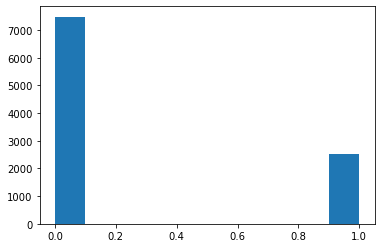

In [7]:
plt.hist(df['S2'])

(array([5044.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4956.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

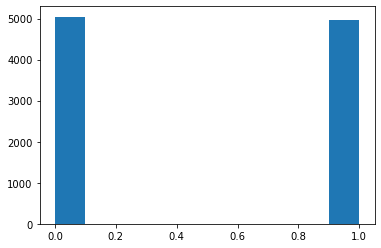

In [8]:
l = [1 if x> 0.5 else 0 for x in np.random.rand(10000)]
plt.hist(l)

In [ ]:
e = np.eye(4)
matrix_rank(e)

4

In [3]:
from numpy.linalg import matrix_rank, det


df['intercept'] = 1.0
#det(df[['plane_transport', 'l']].iloc[0:2])
#df[['plane_transport', 'l']]

In [4]:
# dist_model = smf.logit(formula='S2~ plane_transport', data=df)
# dist_results = dist_model.fit(maxiters=50)

# distance = pd.DataFrame([
#     { 'plane_transport': 1 , 'l': 1},
#     { 'plane_transport': 0, 'l': 1},
# ])


# distance['predicted'] = dist_results.predict(distance)
# distance

test = sm.Logit(df['S1'].to_numpy(), df[['plane_transport', 'intercept']].to_numpy()).fit(maxiters=50)


         Current function value: 0.342225
         Iterations: 35


/home/benjamin/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: maxiters. After release 0.14, this will raise.
  warnings.warn(
/home/benjamin/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
distance = pd.DataFrame([
    { 'plane_transport': 1 , 'intercept': 1},
    { 'plane_transport': 0, 'intercept': 1},
])


distance['predicted'] = test.predict(distance)
distance

,plane_transport,intercept,predicted
0,1,1,4.889654e-01
1,0,1,1.803869e-10


In [11]:
alarm = pd.DataFrame([
    { 'S1': 0, 'S2': 0, 'S3': 0 },
    { 'S1': 0, 'S2': 0, 'S3': 1 },
    { 'S1': 0, 'S2': 1, 'S3': 0 },
    { 'S1': 0, 'S2': 1, 'S3': 1 },
    { 'S1': 1, 'S2': 0, 'S3': 0 },
    { 'S1': 1, 'S2': 0, 'S3': 1 },
    { 'S1': 1, 'S2': 1, 'S3': 0 },
    { 'S1': 1, 'S2': 1, 'S3': 1 },

])
alarm['predicted'] = results.predict(alarm)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'country' is not defined
    S3 ~ country
         ^^^^^^^

In [19]:
alarm

,S1,S2,S3,predicted
0,0,0,0,0.164421
1,0,0,1,0.381874
2,0,1,0,0.339945
3,0,1,1,0.617878
4,1,0,0,0.356327
5,1,0,1,0.634773
6,1,1,0,0.591655
7,1,1,1,0.819787


In [28]:
df

,country,distance,plane_transport,content,amount,S1,S2,S3,alarm,intercept
0,China,5039.643003,1,electrical,23.750378,0,0,0,0,1.0
1,France,451.411456,1,wood,46.187762,1,0,1,0,1.0
2,China,5727.468215,1,electrical,32.970934,0,0,0,0,1.0
3,China,5149.852621,0,tiles,32.567428,0,0,1,1,1.0
4,Russia,3329.612533,1,electrical,17.914029,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,France,515.371809,1,wood,14.204296,1,0,1,1,1.0
9996,France,515.371809,1,tiles,14.958674,0,0,1,0,1.0
9997,Russia,1655.825881,0,wood,28.723528,0,1,1,1,1.0
9998,China,5727.468215,1,wood,31.943566,0,0,0,0,1.0


In [8]:
necessary_cols = ['plane_transport', 'S1', 'intercept']

reduced_df = df[necessary_cols]

test = smf.logit(formula='S1~plane_transport+intercept', data=reduced_df)
dist_results = test.fit(maxiters=50)

# distance = pd.DataFrame([
#     { 'plane_transport': 1 , 'intercept': 1},
#     { 'plane_transport': 0, 'intercept': 1},
# ])


# distance['predicted'] = dist_results.predict(distance)
# distance


/home/benjamin/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: maxiters. After release 0.14, this will raise.
  warnings.warn(


         Current function value: 0.341555
         Iterations: 35


LinAlgError: Singular matrix

In [45]:
reduced_df

,plane_transport,S1,intercept
0,1,0,1.0
1,1,1,1.0
2,1,0,1.0
3,0,0,1.0
4,1,1,1.0
...,...,...,...
9995,1,1,1.0
9996,1,0,1.0
9997,0,0,1.0
9998,1,0,1.0


In [49]:
det(df[['plane_transport', 'intercept']])

LinAlgError: Last 2 dimensions of the array must be square

In [50]:
df['plane_transport'].shape

(10000,)

In [65]:
df['intercept'].shape

(10000,)

In [75]:
df['intercept']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Name: intercept, Length: 10000, dtype: float64

In [3]:
d = [1 if x> 0.5 else 0 for x in np.random.rand(10000)]
e = [1 if x> 0.5 else 0 for x in np.random.rand(10000)]

In [91]:
d=np.reshape(d, (100,100))
e=np.reshape(e, (100,100))

In [7]:
from numpy.linalg import matrix_rank, det
# det(d)

In [99]:
e

array([[1, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 0, 1]])

In [9]:
import statsmodels.api as sm
import pandas as pd 
  

# building the model and fitting the data
log_reg = sm.Logit(e, d).fit()

Optimization terminated successfully.
         Current function value: 0.693142
         Iterations 3


In [10]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9999
Method:                           MLE   Df Model:                            0
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:               6.201e-06
Time:                        15:56:21   Log-Likelihood:                -6931.4
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0092      0.028     -0.325      0.745      -0.065       0.046
==============================================================================
"""

In [ ]:
distance = pd.DataFrame([
    { 'plane_transport': 1 , 'intercept': 1},
    { 'plane_transport': 0, 'intercept': 1},
])


distance['predicted'] = dist_results.predict(distance)
distance

In [8]:
reduced_df

NameError: name 'reduced_df' is not defined